# Analysis of Developmental Language Data Using Multiple Regression
<img src="images/Hoff_Naigles_2002_table5.png">

<img src="images/Nettle_1998_abstract.png" width="1000" height="1000">

## Data

Nettle recorded:

1. the *number of languages* 
1. the *area* (in km<sup>2</sup>) 
1. the *population* 
1. the *mean growing season* (MGS, in months) 
1. the number of weather stations measuring MGS
1. the standard deviation of the measurements of MGS from the different weather stations in each country.

In [81]:
rm(list = ls())

library(tidyverse)
library(repr) # for controlling plot size

df <- read.csv("/Users/ethan/Documents/GitHub/ethanweed.github.io/r-tutorials/data/nettle_1998.csv", 
               sep = ";")

# Nettle reports the population data in 1000's, probably to save room in the data table, 
# but that is an unusual number to think about population in, so let's convert to millions. 
# While we're at it, let's convert km2 to millions, 
# so that the number doesn't appear in scientific notation on the x-axis

df$Population <- df$Population*1000/1000000
df$Area <- df$Area/1000000

# For purposes of plotting, let's convert to a log scale
df$Population_log <- log(df$Population)
df$Area_log <- log(df$Area)
df$Languages_log <- log(df$Languages)

In [82]:
head(df)

Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996,Population_log,Area_log,Languages_log
Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N,3.244933,0.86783173,2.890372
Angola,42,1.246700,10.303,50,6.22,1.87,N,N,2.332435,0.22050006,3.737670
Australia,234,7.713364,17.336,134,6.00,4.17,Y,N,2.852785,2.04295441,5.455321
Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N,4.776978,-1.93795587,3.610918
Benin,52,0.112622,4.889,7,7.14,0.99,N,Y,1.586988,-2.18371820,3.951244
Bolivia,38,1.098581,7.612,48,6.92,2.50,Y,N,2.029726,0.09401935,3.637586


## Plotting Correlations

We can use ggplot to see if there is any clear relationship between these variables. We might expect that there would be a relationship between the area of a country and the population of that country. We can use the ``geom_smooth`` and the ``geom_point`` functions to take a quick look.

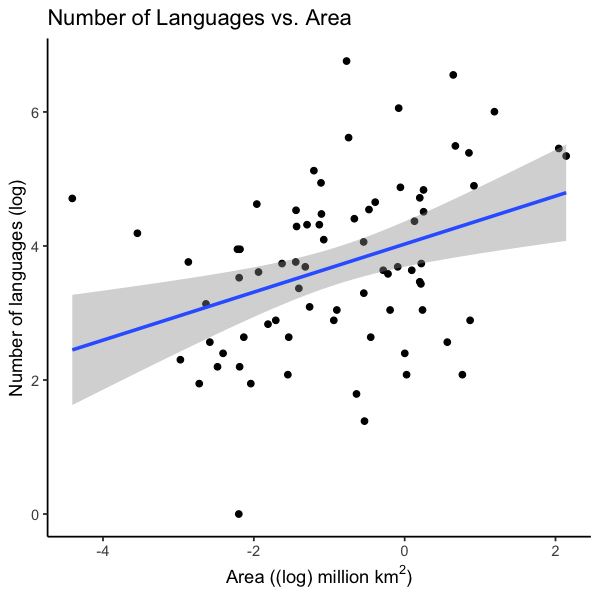

In [85]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(Area_log, Languages_log)) + 
  geom_point() + 
  geom_smooth(method = "lm") +
  theme_classic() + 
  labs(y = "Number of languages (log)", 
       x = (bquote('Area ((log) million km'^2*')')), 
       title = "Number of Languages vs. Area")

## Modelling a Relationship as a Correlation

In [86]:
c <- cor.test(df$Languages, df$Area)

# alter the contents of c$data.name so that it doesn't say e.g. "df$Languages" in the output table
c$data.name <- "Languages and Area"

# output the results in a table
pander::pander(c)



| Test statistic | df |  P value   | Alternative hypothesis |  cor   |
|:--------------:|:--:|:----------:|:----------------------:|:------:|
|     2.576      | 72 | 0.01204  * |       two.sided        | 0.2905 |

Table: Pearson's product-moment correlation: `Languages` and `Area`



The output tells us that there is a positive correlation between the number of languages and the area of the country. 

We can see this in the correlation coefficient (cor) which is 0.29. 

The correlation coefficient is a number between 1 and -1, with 1 indicating a perfect positive correlation, and -1 indicating a perfect negative correlation. 

The p-value of the correlation indicates how confident we can be in the fit of the model.

## Correlation Matrix
Sometimes it can be useful to look at all the correlations between all of the variables in a dataset at once. 

This can be done with a correlation matrix. However, we should be careful about reading too much into a correlation matrix: it just tells us how much the variables correlate with each other. 

In order to be more rigorous about making predictions, we will need to build linear models.

## Correlation Matrix

In [87]:
df1 <- data.frame("Languages" = df$Languages, "Area" = df$Area, "Population" = df$Population, "MGS" = df$MGS)
df1$Languages <- as.numeric(df1$Languages)
#pander(cor(df1))
print(cor(df1))

           Languages       Area  Population         MGS
Languages  1.0000000  0.2905016  0.40875337  0.24179628
Area       0.2905016  1.0000000  0.33308180 -0.12770821
Population 0.4087534  0.3330818  1.00000000 -0.01717242
MGS        0.2417963 -0.1277082 -0.01717242  1.00000000


## Modelling a Relationship as a Linear Regression

In the plot above, we used a linear model to draw the line between the points. The straight line in the plot is a linear model, that minimizes the distance between the line and every individual point. 

If we generate some random numbers to create white noise, then the line should be close to horizontal. 

We can test this by generating some white noise data. Here we create a vector of 1000 random numbers between 0 and 100 plotted against 1000 other random numbers between 0 and 100:

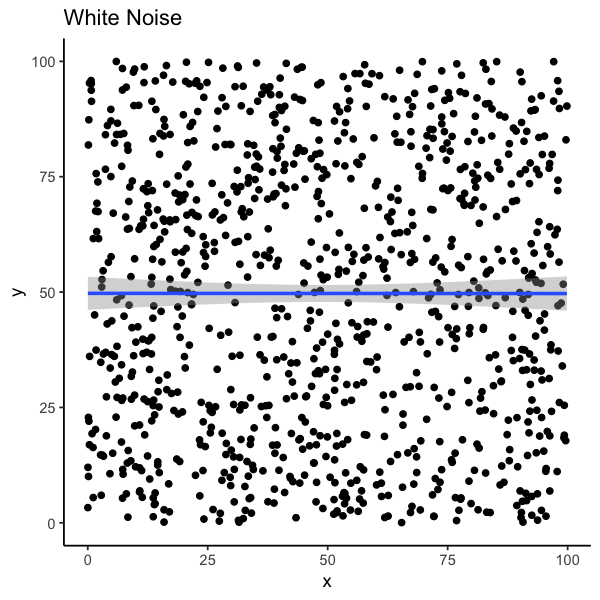

In [88]:
options(repr.plot.width=5, repr.plot.height=5)
set.seed(42) 
x = runif(1000, min=0, max=100); y = runif(1000, min=0, max=100)
df_random <- data.frame("x" = x, "y" = y)
ggplot(data = df_random, aes(x,y)) +
  geom_point() + 
  geom_smooth(method = "lm") + 
  theme_classic() + 
  labs(title = "White Noise")

If we were in doubt, our correlation matrix shows us that there is very little correlation between these two vectors of random numbers:

In [89]:
print(cor(df_random))
#pander((cor(df_random)))

              x             y
x  1.0000000000 -0.0004326948
y -0.0004326948  1.0000000000



## Using the model to make predictions

If we want to go beyond simply observing the correlation and instead use our linear model to make predictions about new data that we have not yet seen, we need to get the equation for our model's line.

That will allow us to extend the line in either direction, and make predictions.

The equation of a line is $y=mx+y_0$, where $y_0$ is the point at which the line intercepts the y-axis. 

This is sometimes also written as $y=mx+b$, or $y=ax+b$. These equations are all equivalant. 

The important thing for our purposes is that they define the slope and intercept of a line which represents a *linear model* of the data.

Linear models are very useful, and they are all over the place in statistics. 

In the case of our random, white-noise data, because the slope is nearly equal to zero, the intercept of the model is a very close approximation of the mean of y:

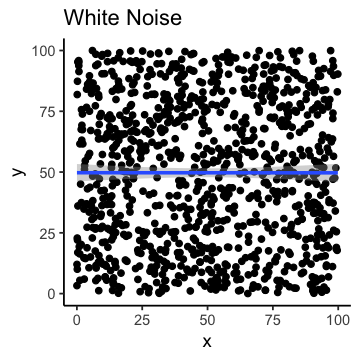

In [90]:
options(repr.plot.width=3, repr.plot.height=3)
set.seed(42) 
x = runif(1000, min=0, max=100); y = runif(1000, min=0, max=100)
df_random <- data.frame("x" = x, "y" = y)
ggplot(data = df_random, aes(x,y)) +
  geom_point() + 
  geom_smooth(method = "lm") + 
  theme_classic() + 
  labs(title = "White Noise")


In [91]:
print(mean(y))

[1] 49.70157


## Modelling the number of languages as a linear function of area

Using Nettle's data, we can build a predictive model that can inform us about the relative importance of different factors.

In [92]:
head(df)

Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996,Population_log,Area_log,Languages_log
Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N,3.244933,0.86783173,2.890372
Angola,42,1.246700,10.303,50,6.22,1.87,N,N,2.332435,0.22050006,3.737670
Australia,234,7.713364,17.336,134,6.00,4.17,Y,N,2.852785,2.04295441,5.455321
Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N,4.776978,-1.93795587,3.610918
Benin,52,0.112622,4.889,7,7.14,0.99,N,Y,1.586988,-2.18371820,3.951244
Bolivia,38,1.098581,7.612,48,6.92,2.50,Y,N,2.029726,0.09401935,3.637586


## How to define a model

We tell R how to model data by using a model formula. 

1. To build a linear (straight line) model, we can use the function ``lm`` (for "linear model")
1. ``data =`` tells R where the data are stored
1. ``~`` means "predicted by"

So, to build a model in which the number of languages is predicted by the area of the country, we can write:


In [93]:
mod <- lm(data = df, Languages ~ Area)

## What does the model tell us?

In [94]:
summary(mod)


Call:
lm(formula = Languages ~ Area, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-119.71  -58.31  -42.12    3.39  784.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    63.37      19.12   3.315  0.00144 **
Area           29.93      11.62   2.576  0.01204 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.9 on 72 degrees of freedom
Multiple R-squared:  0.08439,	Adjusted R-squared:  0.07167 
F-statistic: 6.636 on 1 and 72 DF,  p-value: 0.01204


**Area Estimate** is the regression coefficient, or $B$ (beta). 
The $B$ value represents the predicted change in the outcome measure (the variable on the y-axis) for every unit change in the predictor variable (in this case Area).

## Modelling Multiple Predictor Variables in a Linear Regression

The area of a country seems to predict the number of languages in that country. But might there be other factors involved as well, e.g. the population?

In [95]:
p1 <- ggplot(df, aes(Area_log, Languages_log)) + 
  geom_point() +
  geom_smooth(method = "lm") +
  theme_classic() +
  labs(y = "Number of languages (log)",
       x = (bquote('Area ((log) million km'^2*')')),
       title = "Languages vs. Area")


p2 <- ggplot(df, aes(Population_log, Languages_log)) + 
  geom_point() +
  geom_smooth(method = "lm") +
  theme_classic() +
  labs(y = "Number of languages (log)",
       x = "Population in Millions (log)",
       title = "Languages vs. Population")

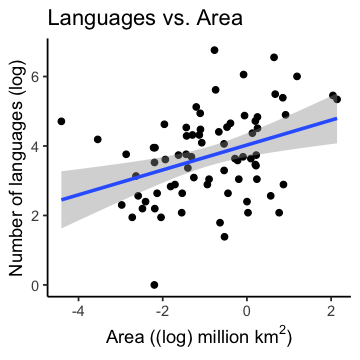

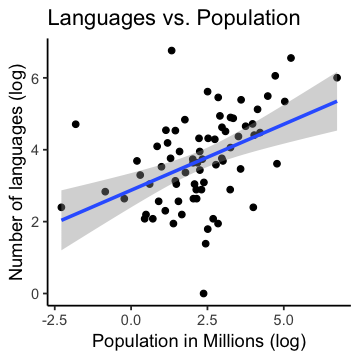

In [96]:
plot(p1); plot(p2)

## Multiple Linear Regression

Multiple regression can be as easy as simply adding another predictor to the model:

In [97]:
mod <- lm(data = df, Languages ~ Area + Population)
summary(mod)


Call:
lm(formula = Languages ~ Area + Population, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.70  -52.66  -37.39    6.53  794.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  57.2891    18.1678   3.153  0.00237 **
Area         17.8871    11.6429   1.536  0.12891   
Population    0.4950     0.1594   3.105  0.00273 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 131.2 on 71 degrees of freedom
Multiple R-squared:  0.1939,	Adjusted R-squared:  0.1712 
F-statistic: 8.538 on 2 and 71 DF,  p-value: 0.0004756


## Controlling for other factors

<img src="images/Hoff_Naigles_2002_table5.png">